# SPARK

#### Spark'ın Çalışma mantığı

Şimdi spark'a direk dalmadan önce biraz çalışma mantığıyla ilgili bilgiler verelim.Spark'da driver process ve executor precess'ler bir jvm üzerinde çalışır. Spark çalışırken işleri bir yönetici(Driver) ve işci(executer,worker) proceseslerden oluşur.Spark driver yani yönetici process Spark'ın merkezi ve başlangıç noktasıdır ve Spark Context'in oluşturulduğu yerdir.Spark context işci node'lara bağlantı oluşturur ya da Rdd oluşturmak için kullanılır,veri setlerini toplar ve cluster'a dagıtır.Zaten sistem Jvm üzerinde yanlız bir tane contex oluşturulabilir.Biz local modda olduğumuz için ve zaten spark jupyterNotebook'la ilişkilendirildiği için şuan da zaten bir sparkContex arka planda oluşturuldu,aynı şekilde konsol üzerinde çalışıyorsanız ise yine spark bir contex oluşturdu.<strong>SparkContex</strong>'i oluşturmak ve kapatmak için SparkContext(),stop() methodları kullanılabilir.

<ol>
<li><p><img src="resim3.png" alt="Örnek Resim" height=200px width=500px>Şimdi Driver program dediğimiz şeyin aslında ileride bahsedeceğimiz sparkSession olduğunu ve SparkContex'inde Driver Programda oluşturulduğunu görüyoruz Ve Cluster'daki node'larla konfigirasyonu sağlayan bir cluster menager olduğunu görüyoruz bunu da ilerdie göreceğiz(YARN,Mesos) </p>
</li>
<img src="image4.png" alt="Örnek Resim" height=200px width=250>Buradaki görsel de ise JVM'ler ile node'ların ilişkisini görebilirsiniz.
</ol>



In [33]:
sc#Spark Context 1.görsel

<SparkContext master=local[*] appName=PySparkShell>

Şimdi uygulama adımız PySparkShell olan bir uygulama başlatıldı ve yukarda gördüğünüz Spark UI spark'ın uygulama içinde rdd'leri(Dağıtılmış veriler) ve cluster durumlarını kontrol etmemiz için oluşturuduğu spark kullanıcı ara yüzüdür.Tıkladığınız zaman yada kendiniz localhost/4040 adresine gittiğiniz zaman spark'ın kullanıcı arayüzüne ulaşacaksınız ve Jobs segmentinin altında event Timeline tıkladığınız zaman altta açılan zaman diagramında Spark driver process'in oluşturulduğunu göreceksiniz.

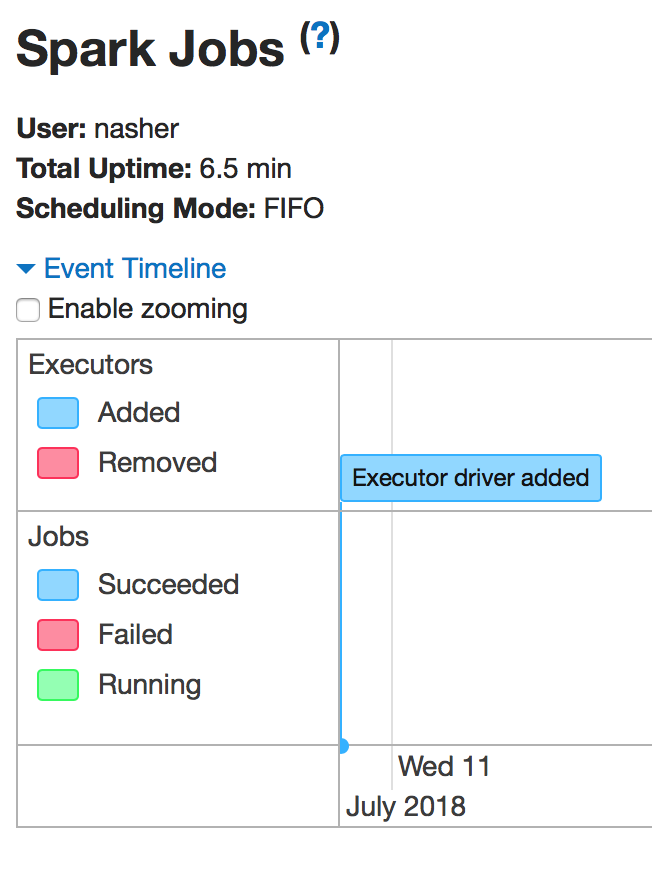

In [3]:
from IPython.display import Image
Image("Screen Shot 2018-07-10 at 20.34.46.png",width=250)

Yazdığımız Pyhton ve R kodları executor process e gitmeden driver procesess üzerinde çalıştığı JVM tarafından dönüştürülür ve executor'lere öyle gönderilir.

Şimdi gelelim bizim driver processimize yani SparkSessiona,SparkSession executor üzerindeki kullanıcı tanımlı manipülasyonlar vb işleri yapan processdir ve Pyhton ve Scala'da spark adıyla tanımlı olarak kullanılan SparkSession bulunur,aşşağıdaki spark adı ile çagırdığımız içibe sparkContex'ide içeren SparkSession'dur.
şimdi bir kaç alıştırma yapalım

In [4]:
spark#Driver Program 1.görsele bakabilirsiniz.

In [7]:
myRange=spark.range(10).toDF("number")
myRange.show()


+------+
|number|
+------+
|     0|
|     1|
|     2|
|     3|
|     4|
|     5|
|     6|
|     7|
|     8|
|     9|
+------+



Yukarıda görüğünüz gibi sparkSessiondan bir Data frame oluşturduk eğer biz bir cluster üzerinde çalışıyor olsaydık ve örneğin on tane node'u bulunan bir cluster olduğunu düşündüğümüzde her eleman başka bir node da bulunacaktı SparkSession bizim için oluşturduğumuz verileri varsayılan olarak 200 parçaya ayırıp node'lara dağıtır.Şimdi bir de Spark'da temel veri yapılarının oluşturuldukdan sonra değiştirilemeyeceğini söylememiz gerekir şöyle ki yukarıda oluşturduğumuz dataFrame artık değiştirilemez sadece üzerinde manipülasyonlar ve değişiklikler yapabiliriz.

In [8]:
divisionby4=myRange.where("number%4=0").toDF("dörtlüler")#Transformations
#eğer myrange deki sayıların 4 e göre modu sıfır olanları divisonby a ata'


Şimdi sparkdaki diğer özellik yukarıda gördüğünüz gibi spark üzerindeki bir dataFrame bir Transformation yazdık.Temel veri setleri üzerindeki tüm değişiklik yapabildiğimiz fonksiyonlar Transformation diye adlandırlır ancak transformation'lar tembel yapıya sahiptir yani bir tetikleyici çagırılmadan yukarıdaki where komutu çalışmaz sadece çalıştırma plan'ı yapılır ve beklenir taki Action adı verilen ilgili method çalıştırılana kadar.

In [9]:
divisionby4.show()# show action'ı yukarıdaki where komutunu tetikledi ve üzerindeki değişiklikler action 
                    #çalıştıkdan sonra yapıldı.

+---------+
|dörtlüler|
+---------+
|        0|
|        4|
|        8|
+---------+



Action'lar veriyi görselleştirme,veriyi toplama,yada veriyi veritabanına yazma işlevlerini yerine getiren işlemlerdir.

In [10]:
mer=spark.range(0,10,2).toDF("merNumber")
mer.show()

+---------+
|merNumber|
+---------+
|        0|
|        2|
|        4|
|        6|
|        8|
+---------+



In [12]:
mer=mer.where("merNumber % 4=0").toDF("ndivisiable by 4 ")
mer.show()

+-----------------+
|ndivisiable by 4 |
+-----------------+
|                0|
|                4|
|                8|
+-----------------+



### Dosya okuma

Öncelikle dosya okumaya bakalım ilk olarak
<a href="https://www.kaggle.com/abecklas/fifa-world-cup/version/5#WorldCupMatches.csv">Word Cup Data</a> dosyasını indirelim.Eğer dosyayı proje dizinine kaydederseniz dosyayı aşşagıdaki gibi okuyabilirsiniz aksi halde dosyanın tam dizini girmeniz gerekir(/user/project/sparks/Begining/WordCupMatches.csv) gibi<p>
<strong>csv(comma-seperated-values)</strong>:Adındanda anlaşılacağı gibi verileri virgül ile ayırıp her satırın bir kayıtı ifade ettiği bir text-db formatıdır.

In [13]:
WordCupData=spark.read.option("inferSchema","true").option("header","true").csv("WorldCupMatches.csv")

Şimdi gördüğünüz gibi WordCupData verisini okurken yine SparkSession ile ilişkilendirdik yani bizim driver process'imizle csv file'ı okuduk.
Şu anda spark bize veri tablomuzdaki sütünlar hakkında bilgi verebilir ancak satır sayısını veremez çünkü  spark tembel'dir sadece satırlara göz atar ve her sütunun tipini belirler. ve onları local dizi'ye çevirir.
CsvFile-->read[DataFrame]-->take(1)-->Array[Row(Year=1930...),Row(Row(Year=1930, Datetime='13 ...)] şeklinde alır

In [14]:
WordCupData.take(1)

[Row(Year=1930, Datetime='13 Jul 1930 - 15:00 ', Stage='Group 1', Stadium='Pocitos', City='Montevideo ', Home Team Name='France', Home Team Goals=4, Away Team Goals=1, Away Team Name='Mexico', Win conditions=' ', Attendance=4444, Half-time Home Goals=3, Half-time Away Goals=0, Referee='LOMBARDI Domingo (URU)', Assistant 1='CRISTOPHE Henry (BEL)', Assistant 2='REGO Gilberto (BRA)', RoundID=201, MatchID=1096, Home Team Initials='FRA', Away Team Initials='MEX')]

şimdi verimizi seyirci sayısına göre sıralayım:

In [16]:
SeyirciWC=WordCupData.where("Attendance != 0").sort("Attendance")

In [17]:
SeyirciWC1=SeyirciWC.select("Away Team Name","Home Team Name","Home Team Goals","Away Team Goals","Attendance")
SeyirciWC1.explain()

== Physical Plan ==
*(2) Project [Away Team Name#60, Home Team Name#57, Home Team Goals#58, Away Team Goals#59, Attendance#62]
+- *(2) Sort [Attendance#62 ASC NULLS FIRST], true, 0
   +- Exchange rangepartitioning(Attendance#62 ASC NULLS FIRST, 200)
      +- *(1) Project [Home Team Name#57, Home Team Goals#58, Away Team Goals#59, Away Team Name#60, Attendance#62]
         +- *(1) Filter (isnotnull(Attendance#62) && NOT (Attendance#62 = 0))
            +- *(1) FileScan csv [Home Team Name#57,Home Team Goals#58,Away Team Goals#59,Away Team Name#60,Attendance#62] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/Users/nasher/SparkProject/Introduction to Spark/WorldCupMatches.csv], PartitionFilters: [], PushedFilters: [IsNotNull(Attendance), Not(EqualTo(Attendance,0))], ReadSchema: struct<Home Team Name:string,Home Team Goals:int,Away Team Goals:int,Away Team Name:string,Attend...


ilk olarak yukarıda <strong>where</strong> transformation'unu kullanarak Null olan <strong>Attendance</strong> satırlarını çıkarttık  sonra  bu  DataFrame'imizdeki istediğimiz değişiklikleri yapıp <strong>explain</strong> ile spark'ın eğer explain yerine bir action çağırsaydık arkada çalıştıracağı fiziksel planı göstermesini sağlıyoruz. 

Aşağıda gördüğünüz gibi action'dan sonra spark aldığı tüm transformationları bir fisiksel planda topluyor ve sonra ilk action ile verileri çekiyor şimdi yukarıdaki  gördüğünüz fiziksel planda önce sort ediyor sonra filtreliyor  ve biz action çagırdımız zamanda da bu fiziksel planı uyguluyor.Zaten fiziksel planın satırlarındaki ilk kelimeleri okuduğumuzda da bu sonuca varabiliriz.

In [19]:
SeyirciWC1.show(5)

+--------------+--------------+---------------+---------------+----------+
|Away Team Name|Home Team Name|Home Team Goals|Away Team Goals|Attendance|
+--------------+--------------+---------------+---------------+----------+
|        France|         Chile|              1|              0|      2000|
|          Peru|       Romania|              3|              1|      2549|
|       Hungary|         Wales|              2|              1|      2823|
|        Sweden|       Germany|              2|              1|      3000|
|        Mexico|   Switzerland|              2|              1|      3580|
+--------------+--------------+---------------+---------------+----------+
only showing top 5 rows



#### Spark ve SQL

Ve ekstra olarak spark'da direk olarak sql sorgularıda atabilirsiniz onun için önce spark'ın elimizde bulunan dataFrame i bir tablo yada görünüme çevirmemiz gerekiyor onuda aşağıdaki komutla kolayca gerçekleştirebiliriz.

In [20]:
SeyirciWC1.createOrReplaceTempView("Data")

In [21]:
sql=spark.sql("""SELECT * FROM Data""")
sql.show(2)

+--------------+--------------+---------------+---------------+----------+
|Away Team Name|Home Team Name|Home Team Goals|Away Team Goals|Attendance|
+--------------+--------------+---------------+---------------+----------+
|        France|         Chile|              1|              0|      2000|
|          Peru|       Romania|              3|              1|      2549|
+--------------+--------------+---------------+---------------+----------+
only showing top 2 rows



Şimdi yukarıda gördüğünüz gini createOrReplaceTempView fonksiyonu bizim SeyirciWC1 dataFrame'mizden sql sorugularını çalıştırabileceğimiz "Data" adında bir tablo oluşturdu ve ardından direk Spark'ın Driver process i olan yukarıdaki spark parametresi ile sql sorgusunu direk driver process e geçirdik o da  oluşturduğu data tablosundan ona ait verileri sql sorugusu ile dönderdi.(yukarıdaki <strong>spark</strong> değişkenini bizim spark Sessionımız olduğuna dikkat edin.)

In [23]:
SeyirciWC1.explain()
sql.explain()

== Physical Plan ==
*(2) Project [Away Team Name#60, Home Team Name#57, Home Team Goals#58, Away Team Goals#59, Attendance#62]
+- *(2) Sort [Attendance#62 ASC NULLS FIRST], true, 0
   +- Exchange rangepartitioning(Attendance#62 ASC NULLS FIRST, 200)
      +- *(1) Project [Home Team Name#57, Home Team Goals#58, Away Team Goals#59, Away Team Name#60, Attendance#62]
         +- *(1) Filter (isnotnull(Attendance#62) && NOT (Attendance#62 = 0))
            +- *(1) FileScan csv [Home Team Name#57,Home Team Goals#58,Away Team Goals#59,Away Team Name#60,Attendance#62] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/Users/nasher/SparkProject/Introduction to Spark/WorldCupMatches.csv], PartitionFilters: [], PushedFilters: [IsNotNull(Attendance), Not(EqualTo(Attendance,0))], ReadSchema: struct<Home Team Name:string,Home Team Goals:int,Away Team Goals:int,Away Team Name:string,Attend...
== Physical Plan ==
*(2) Project [Away Team Name#60, Home Team Name#57, Home Team Goals#58, Away 

Yukarıdada gördüğünüz gibi sorguyu ister sql ile ister spark aracılığı ile dataFrame atın spark'ın arka planda yapacağı işler aynıdır.

Şimdi spark'ın sql kütüphanesinden birkaç fonksiyon üzerinde alıştırma yapalım ve seyiricisi en yüksek olan maçları bulalım.

In [24]:
from pyspark.sql.functions import desc
SeyirciWC1.sort(desc("Attendance")).limit(5).show()

+--------------+--------------+---------------+---------------+----------+
|Away Team Name|Home Team Name|Home Team Goals|Away Team Goals|Attendance|
+--------------+--------------+---------------+---------------+----------+
|        Brazil|       Uruguay|              2|              1|    173850|
|         Spain|        Brazil|              6|              1|    152772|
|    Yugoslavia|        Brazil|              2|              0|    142429|
|        Sweden|        Brazil|              7|              1|    138886|
|      Paraguay|        Mexico|              1|              1|    114600|
+--------------+--------------+---------------+---------------+----------+



Şimdi yukarıdaki sorguyu seyirciW1 den oluşturduğumuz <strong>"Data"</strong> tablosunda deneyelim

#spark.sql("""SELECT Away Team Name,Away Team Name,Home Team Goals,Away Team Goals,Attendance...""")
eğer ki böyle bir sorguyu çalıştırmayı denersek sql hata verecek çünkü tablomuzdaki sutün isimleri  boşluklu olark sql sorugusu atamayız,bunu ise alttaki sorguyu kullanarak çözebiliriz yada columnları tekrar isimlendirip farklı bir tablo'ya atayıp kullanabiliriz.

In [25]:
spark.sql("""select `Away Team Name`,`Home Team Name`,`Away Team Goals`,`Home Team Goals`\
            ,Attendance  from Data  order By (Attendance) desc limit 5 """).show()

+--------------+--------------+---------------+---------------+----------+
|Away Team Name|Home Team Name|Away Team Goals|Home Team Goals|Attendance|
+--------------+--------------+---------------+---------------+----------+
|        Brazil|       Uruguay|              1|              2|    173850|
|         Spain|        Brazil|              1|              6|    152772|
|    Yugoslavia|        Brazil|              0|              2|    142429|
|        Sweden|        Brazil|              1|              7|    138886|
|      Paraguay|        Mexico|              1|              1|    114600|
+--------------+--------------+---------------+---------------+----------+



Şimdi iki tabloda aynı sonuçları verdi semantik olarak farklı olsada spark'ın arkada çalıştırgığı fiziksel planın aynı olduğunu görmüştük ,ve spark action görmeden  aslında gerçekden dosyayı da okumaz  sadece plan yapar.

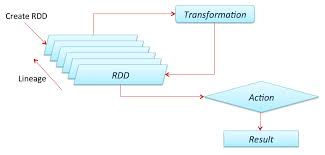

In [26]:
from IPython.display import Image
Image("images.jpg",width=600)

Gördüğünüz gibi rdd'ler ilerde göreceğimiz esnek dağıtılmış datasetler(rdd) bunu Spark'ı low level api'sine doğru incelediğimizde ele alıcaz özetle rdd bizim veri setlermizi tutan node'lara dağıtılmış veridir.